In [9]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data=pandas.read_csv('Files/class_data.csv')
data['t_w']=1

In [289]:
def weight_df(df):    
    df['lumiscale'] = df.RunYear.apply(
               lambda x: (36074.6 if (x == 2015 or x == 2016) else 43813.7))
    weights = df.lumiscale*df.pileupEventWeight_090*df.scale_nom*df.JVT_EventWeight*df.MV2c10_70_EventWeight*df.lepSFObjTight*df.lepSFTrigTight*df.SherpaNJetWeight
    return weights


In [324]:
#load MC samples:
def mc_load(labels_list):
    mc_list=[]
    for i in labels_list:
        name='Files/class_mc_'+i+'.csv'
        df=pandas.read_csv(name)
        df['label'] = i
        if i == 'fakes':
            df['t_w'] = 1
        else:
            df['t_w'] = weight_df(df)
        
        mc_list.append(df)
        
    mc_df = pandas.concat(mc_list,sort=False)
    return mc_df

In [315]:
def plot_stack_var(df_data,df_bkg,lab_list,var,GeV):
    stack_var=[]
    stack_var_w=[]
    stack_var_leg=[]    
    for i in lab_list:
        stack_var.append(df_bkg[var].loc[df_bkg.label==i]*GeV)
        stack_var_w.append(df_bkg.t_w.loc[df_bkg.label==i])
        stack_var_leg.append(i)

    plt.hist( stack_var, binning[var], histtype='step',
         weights=stack_var_w,
         label=stack_var_leg,
         stacked=True, 
         fill=True, 
         linewidth=2, alpha=0.8)
    plt.hist(df_data[var]*GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         color='k',
         linewidth=2, alpha=0.8)
    plt.xlabel(var,fontsize=12)
    plt.ylabel('# Events',fontsize=12) 
    plt.legend()   

In [334]:
# (best_Z_Mll>0) && abs(lep_ID_0)==abs(lep_ID_1) ) 
#apply additional selections
def apply_3l_Zveto_SF_cuts(df):
    df1=df.loc[abs(df.lep_ID_0)==abs(df.lep_ID_1)]
    df2=df1.loc[df1.best_Z_Mll>0]    
    return df2

In [338]:
scale_to_GeV=0.001
binning = {"DRll01": np.linspace(-2, 6, 24),
           "max_eta": np.linspace(0, 2.5, 26),
           "Mll01": np.linspace(0, 200, 25),
          }

In [330]:
labels_list=['ttZ','ttW','ttH','VV','fakes','Others']

In [331]:
bkg_set=mc_load(labels_list)

In [335]:
data_sel=apply_3l_Zveto_SF_cuts(data)
bkg_set_sel=apply_3l_Zveto_SF_cuts(bkg_set)

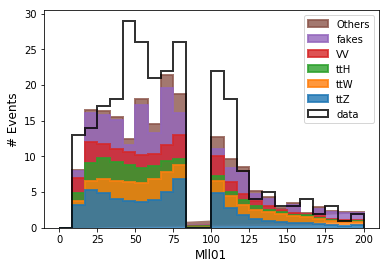

In [339]:
plot_stack_var(data_sel,bkg_set_sel,labels_list,'Mll01',0.001)

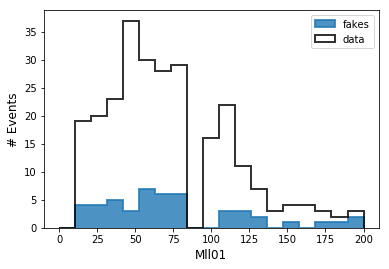

In [329]:
lt=['fakes']
plot_stack_var(data_sel,bkg_set_sel,lt,'Mll01',0.001)

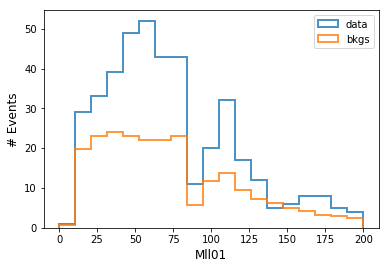

In [306]:
plt.hist(data[var]*scale_to_GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist(bkg_set[var]*0.001, binning[var], histtype='step',
         label=["bkgs"],
         weights=bkg_set.t_w,
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()   

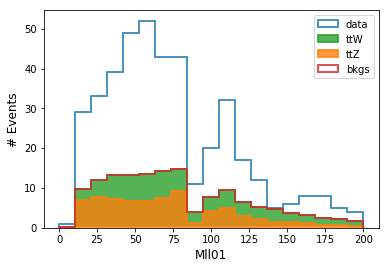

In [224]:
plt.hist(data[var]*scale_to_GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist([ttZ[var]*scale_to_GeV,ttW[var]*scale_to_GeV], binning[var], histtype='step',
         weights=[ttZ.t_w,ttW.t_w],
         label=["ttZ","ttW"],
         stacked=True, 
         fill=True, 
         linewidth=2, alpha=0.8)
plt.hist(bkg_res[var]*scale_to_GeV, binning[var], histtype='step',
         label=["bkgs"],
         weights=bkg_res.t_w,
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()        

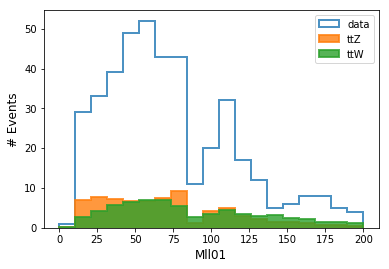

In [177]:
#hd_ttH.head()
var='Mll01'

plt.hist(data[var]*scale_to_GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)

plt.hist(ttZ[var]*scale_to_GeV, binning[var], histtype='step',
         weights=ttZ.t_w,
         label=["ttZ"],
         stacked=False, 
         fill=True, 
         linewidth=2, alpha=0.8)
plt.hist(ttW[var]*scale_to_GeV, binning[var], histtype='step',
         weights=ttW.t_w,
         label=["ttW"],
         stacked=False,
         fill=True, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()